In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from PIL import Image

In [2]:
#Deep learning libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,ZeroPadding2D,Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
#Image Processing
from keras.preprocessing.image import ImageDataGenerator,load_img #ImageDataGenrator is for matrix creation

In [4]:
print(os.listdir("C:/Users/anirudh/Downloads/chest_xray"))

['.DS_Store', 'test', 'train', 'val']


In [5]:
train_folder='C:/Users/anirudh/Downloads/chest_xray/train/'
train_n=train_folder+"NORMAL/"
train_p=train_folder+"PNEUMONIA/"

In [6]:
test_folder='C:/Users/anirudh/Downloads/chest_xray/test/'
val_folder='C:/Users/anirudh/Downloads/chest_xray/val/'


Text(0.5, 1.0, 'Pneumonia X ray')

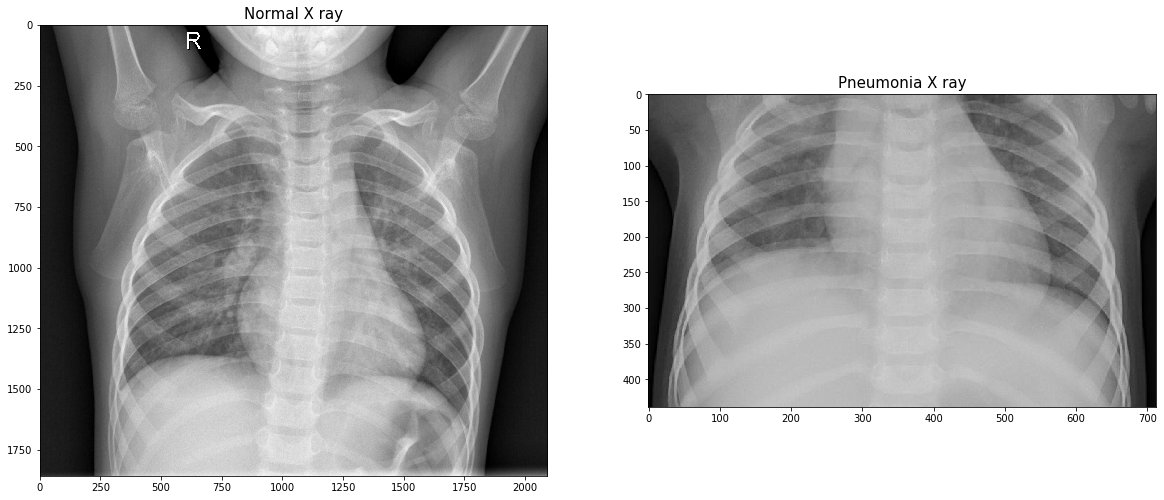

In [7]:
##Load and Display the Image
norm_image=Image.open(train_n+'/IM-0115-0001.jpeg')
sick_image=Image.open(train_p+'/person1_bacteria_1.jpeg')

#Plot the xrays
fig=plt.figure(figsize=(20,10))
a1=fig.add_subplot(1,2,1) # 1,2,1 means 1 row 2 columns and 1st image
img_plot=plt.imshow(norm_image,cmap='gray')
a1.set_title('Normal X ray',fontsize=15)

#Plot the xrays
a1=fig.add_subplot(1,2,2) # 1,2,1 means 1 row 2 columns and 1st image
img_plot=plt.imshow(sick_image,cmap='gray')
a1.set_title('Pneumonia X ray',fontsize=15)

In [8]:
num_of_test_samples=600
batch_size=32

In [9]:
#Fitting the CNN to images
# The function ImageGenerator auguments your image by iterating through image as your CNN is getting ready to process image


In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2)  # WIll generate the images
test_datagen=ImageDataGenerator(rescale=1./255)  # Image Normalization 
training_set=train_datagen.flow_from_directory(train_folder,target_size=(226,226),batch_size=32,class_mode="categorical")
#target_size= is reshaping
validation_set=test_datagen.flow_from_directory(val_folder,target_size=(226,226),batch_size=32,class_mode="categorical")

test_set=test_datagen.flow_from_directory(test_folder,target_size=(226,226),batch_size=32,class_mode="categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
training_set.image_shape  # We have RBG Image

(226, 226, 3)

In [12]:
training_set[0][0]

array([[[[0.40784317, 0.40784317, 0.40784317],
         [0.40784317, 0.40784317, 0.40784317],
         [0.40784317, 0.40784317, 0.40784317],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.40784317, 0.40784317, 0.40784317],
         [0.40784317, 0.40784317, 0.40784317],
         [0.40784317, 0.40784317, 0.40784317],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.40784317, 0.40784317, 0.40784317],
         [0.40784317, 0.40784317, 0.40784317],
         [0.40784317, 0.40784317, 0.40784317],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [13]:
def build_model():
    model=Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=training_set.image_shape)) # A way to add zero padding
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1))) # A way to add zero padding
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1))) # A way to add zero padding
    model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1))) # A way to add zero padding
    model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    
    model.add(Dense(units=256,activation='relu'))
    model.add(Dropout(0.5)) # 50% of dropout Usually 20%, IN Dense Network we use
    model.add(Dense(2,activation='softmax'))
    
    #optimizers
    optmizer=Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optmizer)
    
    return model

In [14]:
model=build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 58, 58, 128)      

In [18]:
history=model.fit_generator(epochs=1,shuffle=True,validation_data=validation_set,generator=training_set,steps_per_epoch=500) 

Epoch 1/1
500/500 [==============================] - 2309s 5s/step - loss: 0.1579 - accuracy: 0.9399 - val_loss: 1.1224 - val_accuracy: 0.6875


In [23]:
 pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,1.122377,0.6875,0.157857,0.939937


In [24]:
#Increase the number of filters and add more Cov2d layers for improving validation accuracy
# Increase the number the epochs 

In [25]:
ypred=model.predict(test_set)

In [27]:
pd.DataFrame(np.round(ypred))   #1 Normal xray 0 is Pnemonia 

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
619,0.0,1.0
620,1.0,0.0
621,1.0,0.0
622,0.0,1.0
